In [57]:
def pick_dropoff(data) :
   
    pick_lat = data["pickup_latitude"]
    pick_lon = data["pickup_longitude"]
    dropoff_lat = data["dropoff_latitude"]
    dropoff_lon = data["dropoff_longitude"]
    info = data["id"]
    
    color_ls = ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
             'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
             'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
             'gray', 'black', 'lightgray']
    
    center = [40.745219,-73.9935417] # lat, long
    map_osm = folium.Map(location = center, zoom_start = 10, tiles = 'Stamen toner') # Stamen toner - 빠른 로딩 가능
    
    
    for lat, long, info_ in zip(pick_lat, pick_lon, info) :
        folium.Marker([lat, long], popup = str(info_) , icon = folium.Icon(color = color_ls[n])).add_to(map_osm)
    
    for lat_, long_, info_ in zip(dropoff_lat, dropoff_lon, info) :
        folium.Marker([lat_, long_], popup = str(info_) , icon = folium.Icon(color = color_ls[n])).add_to(map_osm)
    
    return map_osm
    
    

In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import datetime as dt
from patsy import dmatrix

import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes(palette="muted")

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from taxi_pakage import *

C:\Users\ledes\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:

def storage(result, change) :
    """
    회귀분석 결과 모음 
    
    전역변수로 아래 데이터 프레임 선언
    result_sets = pd.DataFrame(columns = ["R square", "AIC", "BIC", "P_fstatics", "P_omnibus", "P_jb", "Cond_no", "changed"])

    Variables_name.fit() 상태로 삽입
    ex)result = model.fit() 이면
    result를 삽입    
    
    
    change = 이전 데이터 셋에서 무엇을 변화시켰는지 적을 것.
    """    
    

    summary = result.summary()
    
    t1 = summary.tables[0]
    t2 = summary.tables[1]
    t3 = summary.tables[2]

    r_squared = float(t1.data[0][3])
    p_fstatics = float(t1.data[3][3])
    
    p_omnibus = float(t3.data[1][1])
    p_jb = float(t3.data[2][3])
    con = float(t3.data[3][3])
    
    put = {
        "R square" : r_squared,
        "AIC" : result.aic,
        "BIC" : result.bic,
        "P_fstatics" : p_fstatics,
        "P_omnibus" : p_omnibus,
        "P_jb" : p_jb,
        "Cond_no" : con, 
        "changed" : change,
    }
    
    result_sets.loc[len(result_sets)] = put



In [3]:
result_sets = pd.DataFrame(columns = ["R square", "AIC", "BIC", "P_fstatics", "P_omnibus", "P_jb", "Cond_no", "changed"])

In [4]:
taxi = pd.read_csv('edited_taxi.csv')

In [5]:
#OLS regression analysis에서 가장 성적이 좋았던 test_4(outlier는 미 제거된 상태)
#상수항 넣음.
#test_0(index = 0)
features = 'pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + pick_date + pick_time + drop_time + holiday + holiday_Fri + weekday'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result, "test_4 data of before")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     211.6
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:13:22   Log-Likelihood:            -1.4560e+07
No. Observations:             1458644   AIC:                         2.912e+07
Df Residuals:                 1458633   BIC:                         2.912e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.394e+05   8065.733     42.081      0.000    3.24e+05    3.55e+05
pickup_latitude    -4263.9762    151.943    -28.063      0.000   -4561.780   -3966.172
dropoff_longitude   1417.7681     61.969     22.879      0.000    1296.310    1539.226
dropoff_latitude   -1471.2126    139.323    -10.560      0.000   -1744.282   -1198.144
store_and_fwd_flag    84.4421     58.519      1.443      0.149     -30.253     199.137
pick_date              0.6124      0.084      7.268      0.000       0.447       0.778
pick_time             -0.0044      0.001     -8.423      0.000      -0.005      -0.003
drop_time              0.0056      0.001     10.958      0.000       0.005       0.007
holiday              -99.2392     14.707     -6.748      0.000    -128.064     -70.415
holiday_Fri          -26.9971     16.172     -1.669      0.095     -58.693       4.699
weekday               20.0439      4.064      4.933      0.000      12.079      28.008
================================================================================
Omnibus:                  8289848.858   Durbin-Watson:                     2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):   2255339828673762.500
Skew:                         343.839   Prob(JB):                           0.00
Kurtosis:                  192637.555   Cond. No.                       1.47e+08
================================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
result_sets

,R square,AIC,BIC,P_fstatics,P_omnibus,P_jb,Cond_no,changed
0,0.001,2.911981e+07,2.911994e+07,0.0,0.0,0.0,147000000.0,test_4 data of before


In [7]:
taxi = erase_outlier_np(result = result, data = taxi, total_feature = 10 + 1)

In [8]:
#test_1(index = 1)
features = 'pickup_latitude + dropoff_longitude + dropoff_latitude + store_and_fwd_flag + pick_date + pick_time + drop_time + holiday + holiday_Fri + weekday'

model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
storage(result, "delete outlier from test_0")
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                 2.275e+04
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        23:13:31   Log-Likelihood:            -1.1404e+07
No. Observations:             1456143   AIC:                         2.281e+07
Df Residuals:                 1456132   BIC:                         2.281e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6.264e+05   1387.188    451.537      0.000    6.24e+05    6.29e+05
pickup_latitude    -4502.2684     19.923   -225.982      0.000   -4541.317   -4463.220
dropoff_longitude   4512.8981     14.090    320.300      0.000    4485.283    4540.513
dropoff_latitude   -2658.6069     17.457   -152.292      0.000   -2692.823   -2624.391
store_and_fwd_flag   111.6059      6.885     16.210      0.000      98.112     125.100
pick_date              0.6686      0.010     68.083      0.000       0.649       0.688
pick_time             -0.0015   6.08e-05    -25.046      0.000      -0.002      -0.001
drop_time              0.0028      6e-05     45.952      0.000       0.003       0.003
holiday             -123.9037      1.714    -72.290      0.000    -127.263    -120.544
holiday_Fri          -32.9303      1.885    -17.474      0.000     -36.624     -29.237
weekday               15.3182      0.473     32.352      0.000      14.390      16.246
==============================================================================
Omnibus:                   641388.433   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5436821.351
Skew:                           1.920   Prob(JB):                         0.00
Kurtosis:                      11.652   Cond. No.                     2.16e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
result_sets

,R square,AIC,BIC,P_fstatics,P_omnibus,P_jb,Cond_no,changed
0,0.001,2.911981e+07,2.911994e+07,0.0,0.0,0.0,147000000.0,test_4 data of before
1,0.135,2.280715e+07,2.280729e+07,0.0,0.0,0.0,216000000.0,delete outlier from test_0


In [10]:
sm.stats.anova_lm(result, tpy = 2)

C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ledes\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
pickup_latitude,1.0,3.406571e+10,3.406571e+10,91741.253608,0.000000e+00
dropoff_longitude,1.0,3.409970e+10,3.409970e+10,91832.789916,0.000000e+00
dropoff_latitude,1.0,8.440343e+09,8.440343e+09,22730.411513,0.000000e+00
store_and_fwd_flag,1.0,1.053708e+08,1.053708e+08,283.770660,1.148072e-63
pick_date,1.0,2.066453e+09,2.066453e+09,5565.097610,0.000000e+00
pick_time,1.0,1.219458e+09,1.219458e+09,3284.083322,0.000000e+00
drop_time,1.0,8.331921e+08,8.331921e+08,2243.842199,0.000000e+00
holiday,1.0,3.254030e+09,3.254030e+09,8763.321165,0.000000e+00
holiday_Fri,1.0,2.376542e+06,2.376542e+06,6.400187,1.141094e-02
weekday,1.0,3.886444e+08,3.886444e+08,1046.645449,1.574900e-229


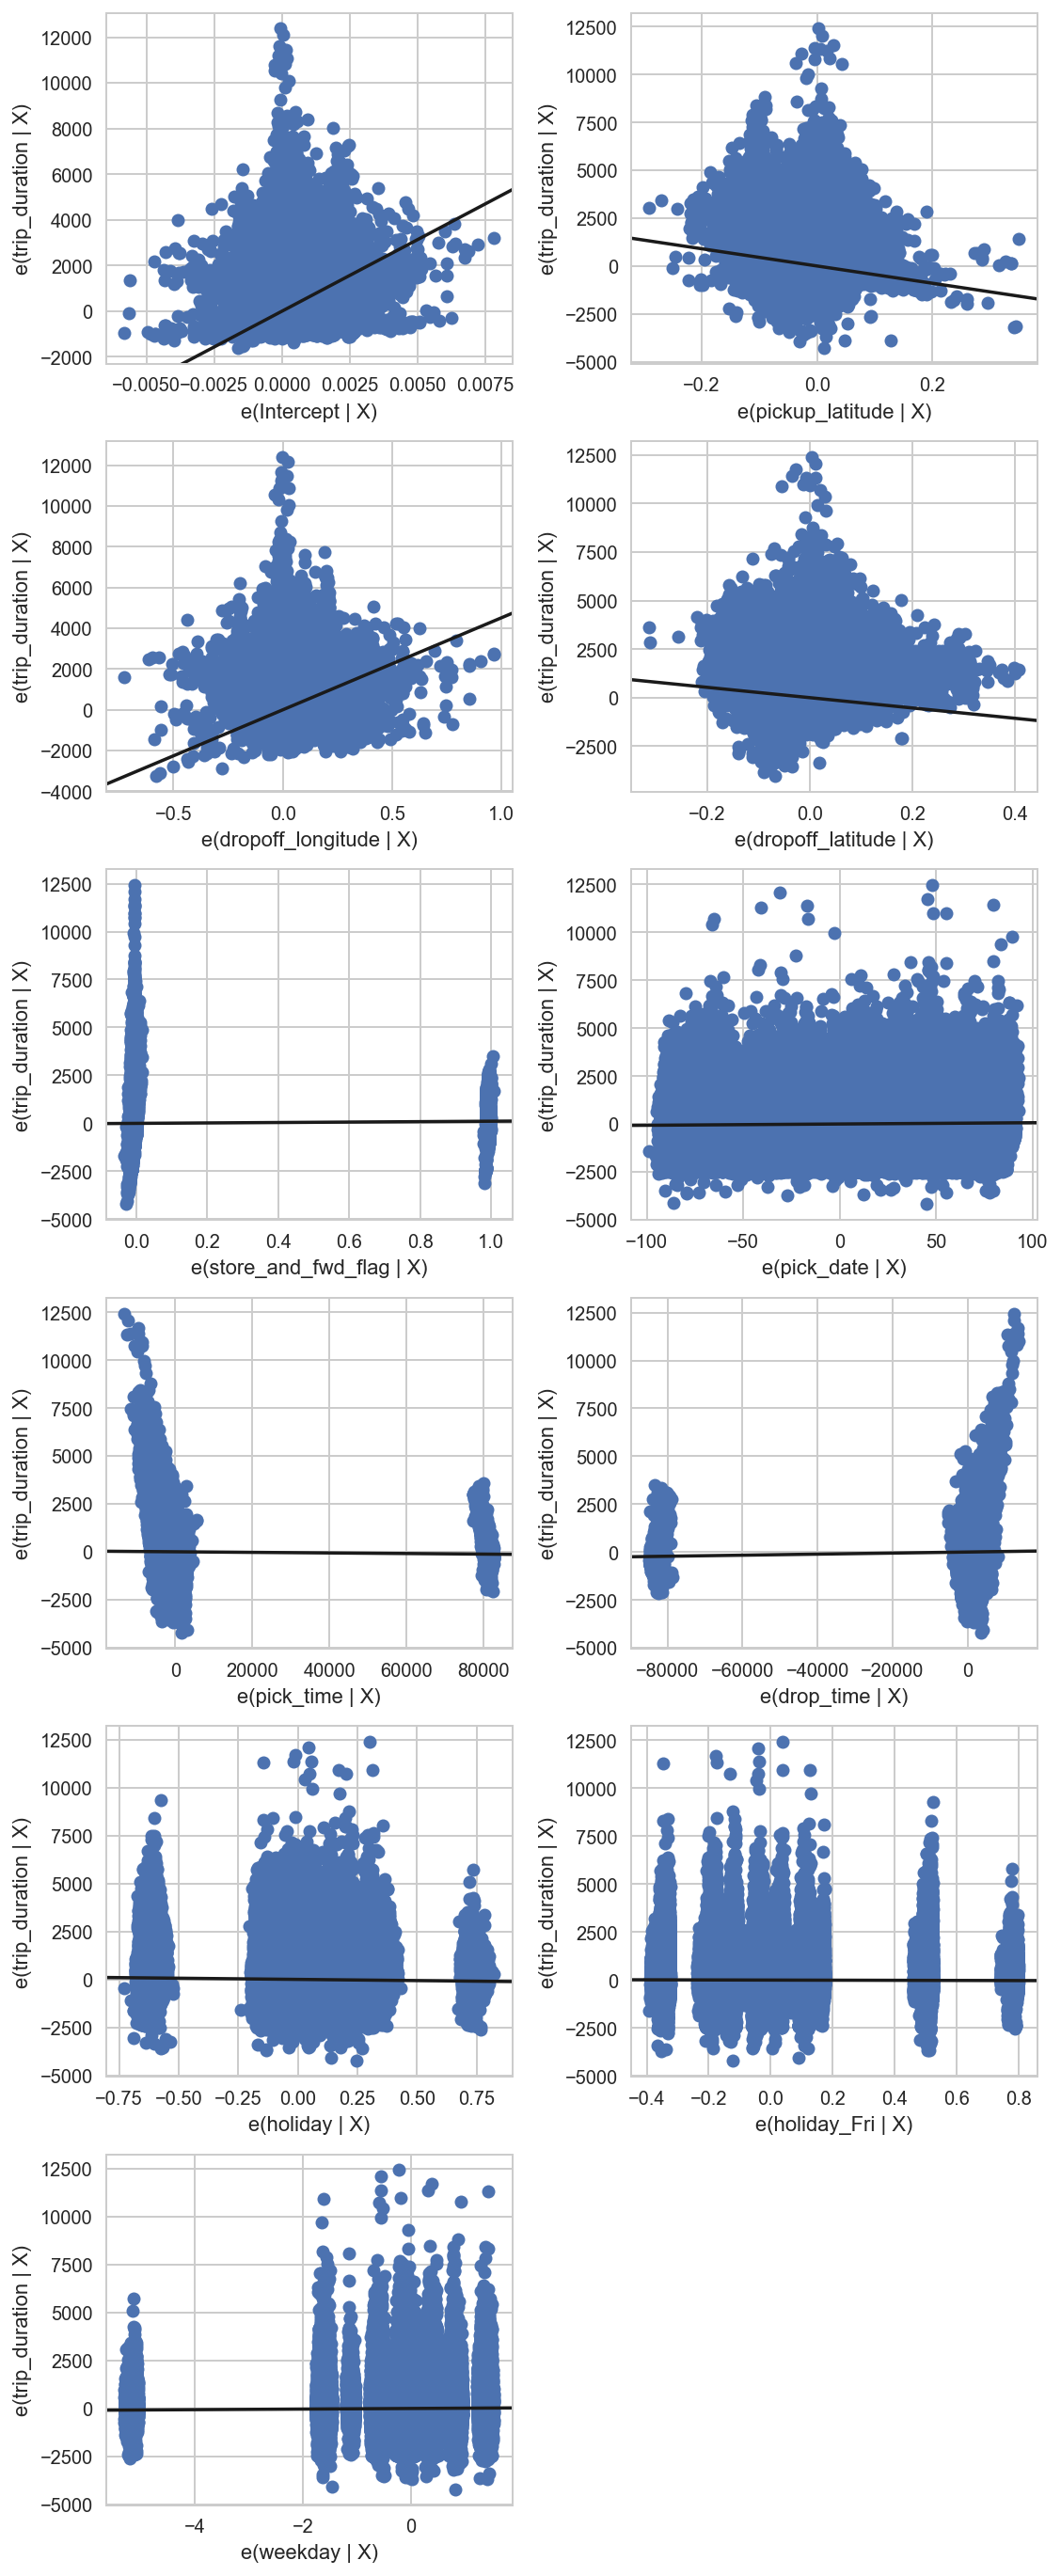

In [11]:
#잔차의 정규성
fig = plt.figure(figsize = (8, 20))
sm.graphics.plot_partregress_grid(result, fig = fig)
fig.suptitle("")
plt.show()